Found 44053 images belonging to 31 classes.
Found 5508 images belonging to 31 classes.
Found 5520 images belonging to 31 classes.


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,199 (2.62 MB)

 Trainable params: 687,199 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 1190s 832ms/step - accuracy: 0.7660 - loss: 0.8308 - val_accuracy: 0.9969 - val_loss: 0.0086
Epoch 2/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 199s 144ms/step - accuracy: 0.9874 - loss: 0.0421 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 3/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 192s 140ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9991 - val_loss: 0.0028
Epoch 4/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 202s 147ms/step - accuracy: 0.9949 - loss: 0.0172 - val_accuracy: 0.9991 - val_loss: 0.0033
Epoch 5/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 206s 150ms/step - accuracy: 0.9965 - loss: 0.0128 - val_accuracy: 0.9989 - val_loss: 0.0037
Epoch 6/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 197s 143ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9975 - val_loss: 0.0067
Epoch 7/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 205s 149ms/step - accuracy: 0.9965 - loss: 0.0097 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 8/10
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 209s 151ms/step - a

Test Accuracy: 1.00
Model saved as real_road_sign.h5


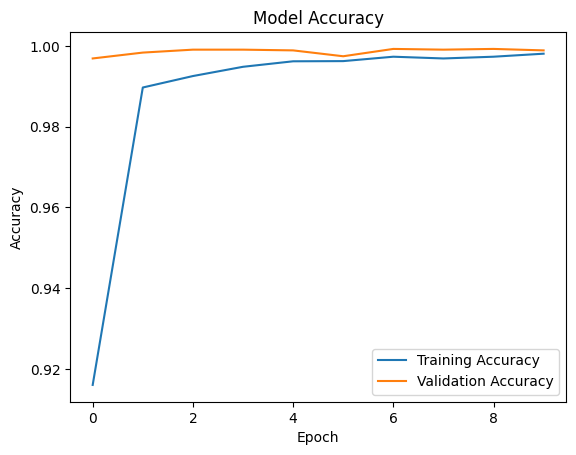

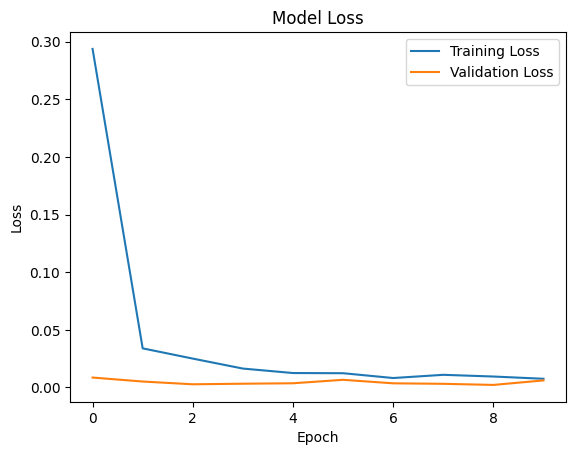

In [2]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set dataset path
original_dataset_path = "uk_roadsigns"  # Original dataset folder
base_dir = "splitted_uk_roadsigns"  # New base directory for train, val, test splits

# Ensure base directory exists
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Function to split the dataset
def split_dataset(original_dir, train_dir, val_dir, test_dir, train_ratio=0.8, val_ratio=0.1):
    # Ensure target directories exist
    for dir_path in [train_dir, val_dir, test_dir]:
        os.makedirs(dir_path, exist_ok=True)

    # Iterate through class folders
    for class_name in os.listdir(original_dir):
        class_path = os.path.join(original_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Get all files in the class directory
        files = os.listdir(class_path)
        train_files, temp_files = train_test_split(files, test_size=1 - train_ratio, random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

        # Copy files to respective directories
        for file_name in train_files:
            src = os.path.join(class_path, file_name)
            dst = os.path.join(train_dir, class_name)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for file_name in val_files:
            src = os.path.join(class_path, file_name)
            dst = os.path.join(val_dir, class_name)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for file_name in test_files:
            src = os.path.join(class_path, file_name)
            dst = os.path.join(test_dir, class_name)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

# Split the dataset into train, validation, and test
split_dataset(original_dataset_path, train_dir, val_dir, test_dir)

# Preprocessing the data
image_size = (64, 64)  # Resize images to a uniform size
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalize images

# Load training, validation, and test data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
epochs = 10
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save("real_road_sign.h5")
print("Model saved as real_road_sign.h5")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [3]:
model.save("real_road_sign.h5")

Model loaded successfully.
Found 55081 images belonging to 31 classes.
Number of unique true labels: 31
Number of classes in class_names: 31
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 288s 167ms/step

Classification Report:
                            precision    recall  f1-score   support

                     10mph       1.00      1.00      1.00      3639
                     20mph       1.00      1.00      1.00      4617
                     30mph       1.00      1.00      1.00      2668
                     40mph       1.00      1.00      1.00      2012
                crossroads       1.00      1.00      1.00      1974
         cycle_route_ahead       1.00      1.00      1.00       730
                     frail       1.00      1.00      1.00      1099
                  give_way       1.00      1.00      1.00      4082
      give_way_to_oncoming       1.00      1.00      1.00      2004
                 keep_left       0.99      1.00      0.99      1518
                keep_right       0.99  

<Figure size 1200x1200 with 0 Axes>

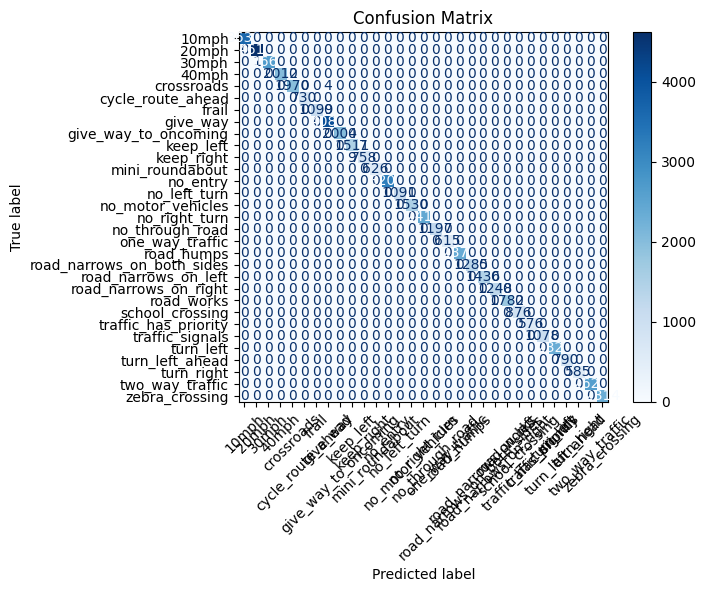

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set dataset path
dataset_path = "uk_roadsigns"
image_size = (64, 64)  # Image size used during training
batch_size = 32  # Same as training

# Load the saved model
model = load_model("real_road_sign.h5")
print("Model loaded successfully.")

# Create ImageDataGenerator for validation/testing data
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Prepare test data
test_data = test_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep shuffle False to maintain order for metrics
)

# Get true labels and class names
true_labels = test_data.classes
class_names = list(test_data.class_indices.keys())  # Get class labels

# Debugging: Check for mismatches
print(f"Number of unique true labels: {len(np.unique(true_labels))}")
print(f"Number of classes in class_names: {len(class_names)}")

# Ensure class names match the number of unique classes in the dataset
num_classes = len(np.unique(true_labels))
if num_classes != len(class_names):
    print(f"Mismatch detected: {num_classes} unique labels, {len(class_names)} class names.")
    # Adjust target_names to match the number of unique labels
    target_names = class_names[:num_classes]
else:
    target_names = class_names

# Predict the classes
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)

# Plot confusion matrix
plt.figure(figsize=(12, 12))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model("real_road_sign.h5")
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print("Model loaded successfully.")

# Define road sign labels and descriptions
# Define road sign labels and descriptions
road_sign_labels = {
    0: ("10mph", "Indicates a maximum speed limit of 10 mph."),
    1: ("20mph", "Indicates a maximum speed limit of 20 mph."),
    2: ("30mph", "Indicates a maximum speed limit of 30 mph."),
    3: ("40mph", "Indicates a maximum speed limit of 40 mph."),
    4: ("Crossroads", "Indicates a crossroads ahead."),
    5: ("Cycle Route Ahead", "Indicates a designated cycle route ahead."),
    6: ("Frail", "Warns of frail or vulnerable pedestrians."),
    7: ("Give Way", "Indicates to give way to other traffic."),
    8: ("Give Way to Oncoming", "Indicates to give way to oncoming traffic."),
    9: ("Keep Left", "Indicates to keep to the left."),
    10: ("Keep Right", "Indicates to keep to the right."),
    11: ("Mini Roundabout", "Indicates a mini roundabout ahead."),
    12: ("No Entry", "Prohibits entry to all vehicles."),
    13: ("No Left Turn", "Prohibits left turns."),
    14: ("No Motor Vehicles", "Prohibits motor vehicles."),
    15: ("No Right Turn", "Prohibits right turns."),
    16: ("No Through Road", "Indicates a road with no exit."),
    17: ("One Way Traffic", "Indicates one-way traffic."),
    18: ("Road Humps", "Warns of speed bumps ahead."),
    19: ("Road Narrows on Both Sides", "Warns of a road narrowing on both sides."),
    20: ("Road Narrows on Left", "Warns of a road narrowing on the left."),
    21: ("Road Narrows on Right", "Warns of a road narrowing on the right."),
    22: ("Road Works", "Warns of roadworks ahead."),
    23: ("School Crossing", "Warns of a school crossing."),
    24: ("Traffic Has Priority", "Indicates that traffic has priority over oncoming traffic."),
    25: ("Traffic Signals", "Warns of traffic signals ahead."),
    26: ("Turn Left", "Indicates a mandatory left turn."),
    27: ("Turn Left Ahead", "Indicates a mandatory left turn ahead."),
    28: ("Turn Right", "Indicates a mandatory right turn."),
    29: ("Two-Way Traffic", "Warns of two-way traffic ahead."),
    30: ("Zebra Crossing", "Indicates a pedestrian crossing.")
}


# Path to the single test image
test_image_path = "C:/Users/ACER/road_sign_system/python_datasets/splitted_uk_roadsigns/test/10mph/1_10mph_17_0_inner.png"  # Replace with the correct path

# Check if the file exists
if not os.path.exists(test_image_path):
    print(f"Error: The file at {test_image_path} was not found.")
else:
    # Define the image size used during training
    image_size = (64, 64)

    try:
        # Load the image
        image = load_img(test_image_path, target_size=image_size)

        # Convert the image to an array and normalize
        image_array = img_to_array(image) / 255.0  # Normalize pixel values
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

        # Make a prediction
        prediction = model.predict(image_array)

        # Get the predicted class
        predicted_class = np.argmax(prediction, axis=-1)[0]
        confidence = np.max(prediction) * 100

        # Get the label and description
        label, description = road_sign_labels.get(predicted_class, ("Unknown", "No description available."))

        # Display the results
        print(f"Predicted Class: {label}")
        print(f"Description: {description}")
        print(f"Confidence: {confidence:.2f}%")

        # Plot the image with predictions
        plt.imshow(image)
        plt.title(f"{label}: {description}\nConfidence: {confidence:.2f}%")
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


Model loaded successfully.
Error: The file at C:/xampp/htdocs/python_datasets/splitted_uk_roadsigns/test/10mph/1_10mph_17_0_inner.png was not found.
